# Mean field Floquet dynamics
Consider the Hamiltonian of the type
\begin{equation}
\hat{H}(t) = \hat{H}_0 + \left(h \cos{(\omega t)} + h_0\right)\; \hat{H}_1,
\end{equation}

where

\begin{eqnarray}
\hat{H}_0 &=& -\frac{1}{2N}\sum_{ij}\hat{\sigma}^z_i\hat{\sigma}^z_j,\\
\hat{H}_1 &=& \sum_i\hat{\sigma}^x_i.
\end{eqnarray}

Here, we have $N$ spin-$1/2$ particles in a $1-$dimensional lattice, and $i,j$ are site indices. We will now attempt a numerical evaluation of
the Floquet eigenspectrum of this system.

First, define permutation operator $P_{ij} = \displaystyle\frac{1}{2}\left(1+ \vec{\sigma}_i\cdot\vec{\sigma}_j\right)$,
and note that $[P_{ij}, H]=0$. Thus, we can reduce the problem size from the full $2^N\times 2^N$ Hilbert space
to the subspace spanned by the degenerate eigenvectors of $P_{ij}$ corresponding to a single eigenvalue, say $1$.
This is isomorphic to the subspace spanned by degenerate eigenstates of the operator $S^2=|\vec{S}|^2$ with eigenvalue
$\displaystyle\frac{N}{2}\left(\frac{N}{2}+1\right)$, where

\begin{equation}
\vec{S}=S^x\hat{x}+S^y\hat{y}+S^z\hat{z}\equiv \sum_i \vec{\sigma}_i.
\end{equation}

Note that, since $[S^2, S^z]=0$, these are also eigenstates of $S^z$ in this so-called
TSS subspace. The corresponding eigenvalues are $Ns_n$, where $s_n=-\frac{1}{2}+\frac{n}{N}$ and the index
$n= 0 (1) N$ has $N+1$ values. Thus

\begin{equation}
S^z |s_n\rangle = Ns_n|s_n\rangle,
\end{equation}

and the matrix elements $(S^z)_{ij} = Ns_s\delta_{ij}$. Furthermore, defining ladder operators

\begin{equation}
S_\pm \equiv S^x \pm i S^y,
\end{equation}

and using the result

\begin{equation}
S_\pm |s_n\rangle = \sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n\pm 1}\right)}\;\;|s_{n\pm 1}\rangle,
\end{equation}

we can obtain the matrix elements $S^x = S_+ + S_-$ to be

\begin{multline}
(S^x)_{nm} = \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n + 1}\right)}\;\;\delta_{n+1, m}  \\
                        +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_n\left(Ns_{n- 1}\right)}\;\;\delta_{n-1,m}\bigg]
\end{multline}

Note that, since the Hamiltonian can be readily written as
$H(t) = -\displaystyle\frac{1}{2N}(S^z)^2 - h_0\cos{(\omega t )}S^x$, the matrix elements of
\begin{eqnarray}
\left(H_0\right)_{ij} &=& -\frac{N}{2} s^2_i \delta_{ij},\nonumber\\
\left(H_1\right)_{ij} &=& \frac{1}{2}\bigg[\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i + 1}\right)}\;\;\delta_{i+1, j}  \\
    & &                     +\;\sqrt{\frac{N}{2}\left(\frac{N}{2}+1\right) - Ns_i\left(Ns_{i- 1}\right)}\;\;\delta_{i-1,j}\bigg]
\end{eqnarray}

Note that, in the continuum limit, $N\rightarrow\infty$, we can ignore the difference between adjacent values
of $s_i$. Thus, the Hamiltonian per particle becomes $h(t)\equiv \displaystyle\frac{1}{N}H(t) = h + h_0\cos{(\omega t)}h_1$, where

\begin{eqnarray}
\left(h\right)_{ij} &\approx& -\frac{1}{2} s^2_i \delta_{ij},\nonumber\\
h_0 &\rightarrow& -\frac{1}{2}s^2\\
\left(h_1\right)_{ij} &\approx& \frac{1}{2}\sqrt{\frac{1}{4} - s^2_i}\left[\delta_{i+1, j}  + \delta_{i-1,j}\right]\\
h_1 &\rightarrow& \sqrt{\frac{1}{4} - s^2_i}\;\;\cos{p},
\end{eqnarray}
where we have expanded the matrix elements in a basis of $e^{ipx}$. In this limit, we obtain the Lipkin Model (Insert from previous notebook)
.


References:

[1] Check T. Mori's paper equation (12)

# QuTip code

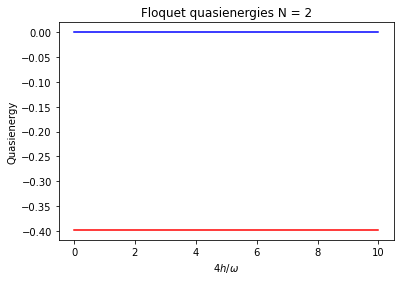

In [84]:
import numpy as np
from qutip import *
from scipy import *
from pylab import *
from array import *

def delta_func(x,y):
    if ( x == y ):
        return 1.0
    else:
        return 0.0
    

N = 2
dc = 0.1
hsteps = 100
tsteps = hsteps +1
s = -0.5 + (1./N) * np.arange(N)
H0 = Qobj(np.diagflat(-0.5 * (N * s)**2)) 

delta_matrix = np.zeros((N,N))
for i in np.arange(N):
    for j in np.arange(N):
        delta_matrix[i][j] = delta_func(i+1,j) + delta_func(i-1,j)

H11 = Qobj(0.5 * np.sqrt(0.25*N*N - (N * s)**2) * delta_matrix)

omega = 4.0
args = {'w': omega}
A_vec = np.linspace(0, 10, hsteps)


H0 = (H0 + dc * H11)
T = (2*pi)/omega
tlist  = np.linspace(0.0, 10 * T, tsteps)
psi0   = basis(N,0)
q_energies = np.zeros((len(A_vec), N))

for idx, A in enumerate(A_vec):
    H1 = A * H11
    H = [H0, [H1, lambda t,args: sin(args['w'] * t)]]
    f_modes, f_energies = floquet_modes(H, T, args, True)
    q_energies[idx,:] = f_energies
    
figure()
plot(4*A_vec/omega, q_energies[:,0] / delta, 'b', 4*A_vec/omega, q_energies[:,1] / delta, 'r')
xlabel(r'$4h/\omega$')
ylabel(r'Quasienergy')
title(r'Floquet quasienergies N = 2')
show()

running for N = 10


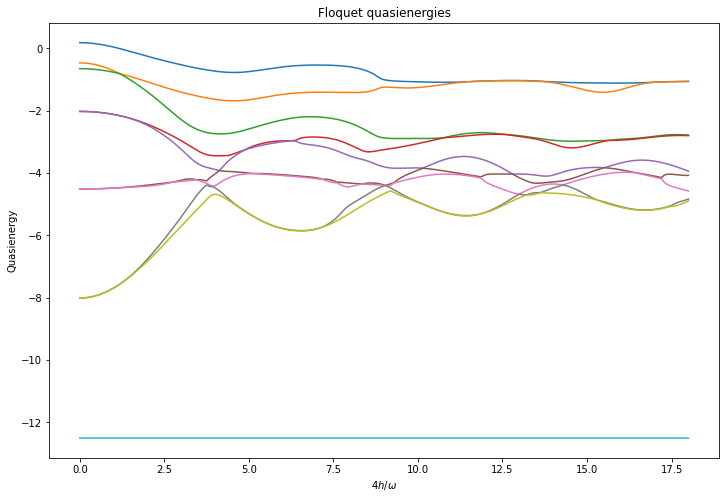

time taken 120.65650057792664 sec


In [75]:
import numpy as np
from qutip import *
from scipy import *
from pylab import *
from array import *
import matplotlib.pyplot as plt
import time

start = time.time()
def delta_func(x,y):
    if ( x == y ):
        return 1.0
    else:
        return 0.0
    

N = 10
dc = 0.1
hsteps = 5000
tsteps = hsteps +1
s = -0.5 + (1./N) * np.arange(N)
H0 = Qobj(np.diagflat(-0.5 * (N * s)**2)) 

delta_matrix = np.zeros((N,N))
for i in np.arange(N):
    for j in np.arange(N):
        delta_matrix[i][j] = delta_func(i+1,j) + delta_func(i-1,j)

H11 = Qobj(0.5 * np.sqrt(0.25*N*N - (N * s)**2) * delta_matrix)

omega = 40.0
args = {'w': omega}
A_vec = np.linspace(0, 180, hsteps)


H0 = (H0 + dc * H11)
T = (2*pi)/omega
tlist  = np.linspace(0.0, 1 * T, tsteps)
psi0   = basis(N,0)
q_energies = np.zeros((len(A_vec), N))

for idx, A in enumerate(A_vec):
    H1 = A * H11
    H = [H0, [H1, lambda t,args: sin(args['w'] * t)]]
    f_modes, f_energies = floquet_modes(H, T, args, True)
    q_energies[idx,:] = f_energies

    
print('running for N =',N)    
plt.figure(figsize=(12,8))
for i in np.arange(N):
    plt.plot(4 *A_vec/omega, q_energies[:,i])
plt.xlabel(r'$4h/\omega$')
plt.ylabel(r'Quasienergy')
plt.title(r'Floquet quasienergies')
plt.show()

print('time taken',time.time()-start,'sec')

# Tutorials

H0 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.62831853  0.        ]
 [ 0.         -0.62831853]]


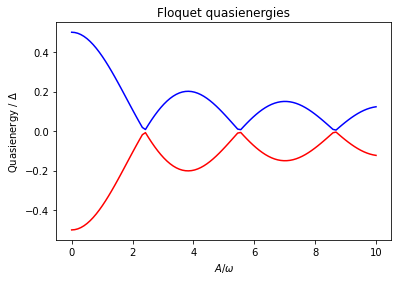

In [73]:
# sample  example from QuTip tutorial website

import numpy as np
from qutip import *
from scipy import *
from pylab import *

delta = 0.2 * 2*np.pi; eps0  = 0.0 * 2*np.pi
omega = 1.0 * 2*np.pi; A_vec = np.linspace(0, 10, 100) * omega;
T = (2*pi)/omega

tlist  = np.linspace(0.0, 10 * T, 101)
psi0   = basis(2,0)
q_energies = np.zeros((len(A_vec), 2))

H0 = delta/2.0 * sigmaz() - eps0/2.0 * sigmax() 
print('H0',H0)
args = {'w': omega}

for idx, A in enumerate(A_vec):
    H1 = A/2.0 * sigmax()
    H = [H0, [H1, lambda t,args: sin(args['w'] * t)]]
    f_modes, f_energies = floquet_modes(H, T, args, True)
    q_energies[idx,:] = f_energies
    
figure()
plot(A_vec/omega, q_energies[:,0] / delta, 'b', A_vec/omega, q_energies[:,1] / delta, 'r')
xlabel(r'$A/\omega$')
ylabel(r'Quasienergy / $\Delta$')
title(r'Floquet quasienergies')
show()

In [38]:
qeye(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]